In [1]:
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_swiss_roll, make_blobs, make_s_curve

In [2]:
import magnipy
reload(magnipy)
from magnipy import Magnipy
from sklearn.decomposition import PCA
from magnipy.datasets import sample_sphere

## Loading the Datasets

In [3]:
np.random.seed(0)
n=1000

### name: [dataset, true dimension]
all_data ={'swiss roll': [make_swiss_roll(n)[0], 2], 
           'swiss hole': [make_swiss_roll(n, hole=True)[0],2],
    'normal': [np.random.normal(0,1,size=(n,3)),3],
    'uniform': [np.random.uniform(0,1,size=(n,3)),3],
    'blobs': [make_blobs(n, centers=5, n_features=3)[0],3],
    's-curve': [make_s_curve(n)[0],2],
    'sphere': [sample_sphere(n, 3), 2]
}

datasets = [d[0] for d in all_data.values()]
dims = [d[1] for d in all_data.values()]
names = list(all_data.keys())

## Computing Magnitude Functions

### Using the Magnipy Class

Next, we create the Magnipy object for each dataset to handle all magnitude computations.

In [4]:
mags=[]
for i, data in enumerate(datasets):
    print(i, names[i])
    mags.append(Magnipy(data, n_ts=100, name=names[i], metric="euclidean", log_scale = True))

0 swiss roll
1 swiss hole
2 normal
3 uniform
4 blobs


/home/kat/magnipy/magnipy/.venv/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/kat/magnipy/magnipy/.venv/lib/python3.10/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/kat/magnipy/magnipy/.venv/lib/python3.10/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/kat/magnipy/magnipy/.venv/lib/python3.10/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficie

5 s-curve
6 sphere


### Computing Magnitude Functions

For each space, we then compute the magnitude functions as follows. These magnitude functions the summarise magnitude i.e the effective number of distinct points in each space across varying scales of distance t.

Text(0.5, 1.0, 'Magnitude')

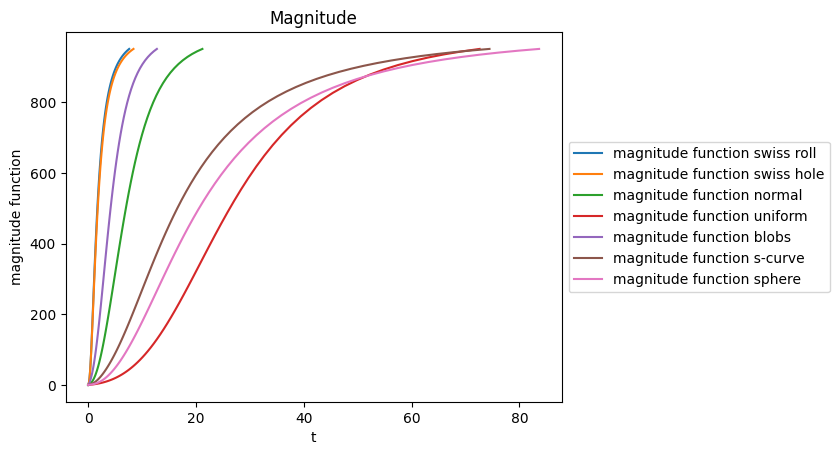

In [6]:
for Mag in mags:
    Mag.plot_magnitude_function()
    mag, ts = Mag.get_magnitude()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Magnitude")

### Choosing the Evaluation Scales

Note, that by default, we have automatically estimated each magnitude function's domain using the approximate convergence scale when magnitude has reached 0.95*|X|, that is 95% of the space's cardinality. So we define each function's evaluation interval from zero until this convergence scale.

Across datasets, we can the compute the medium convergence scale to define a common evaluation interval across which we can compare all spaces.

The median convergence scale equals 21.18.
We pick the convergence scale of the Swiss Roll, which equals 7.6, as a reference scale.


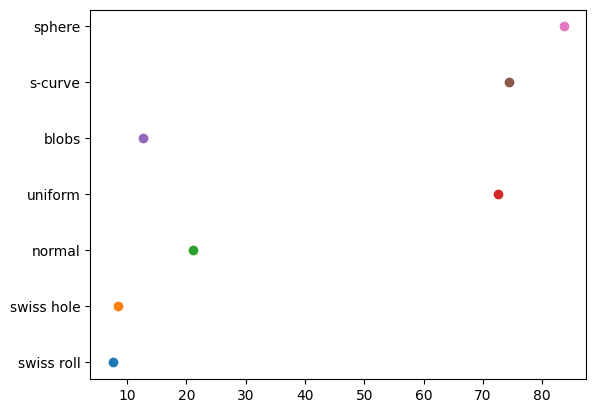

In [28]:
t_convs=[]
for i, Mag in enumerate(mags):
    n=Mag.get_dist().shape[0]
    t_convs.append(Mag.get_t_conv())
    plt.scatter(Mag.get_t_conv(), Mag.get_name())
t_med = np.median(t_convs)
t_cut = mags[0].get_t_conv()
print(f"The median convergence scale equals {round(t_med, 2)}.")
print(f"We pick the convergence scale of the Swiss Roll, which equals {round(t_cut, 2)}, as a reference scale.")

### Computing the Magnitude Dimension Profile

Further, we can compute each space's instantaneous magnitude dimension profile by taking the slope of the log-log plot of the magnitude function across the evaluation scales. The magnitude dimension, the maximum instantenious growth rate, then approximates the intrinsic dimensionality of each space.

The magnitude dimension of swiss roll equals 1.93.
The magnitude dimension of swiss hole equals 1.9.
The magnitude dimension of normal equals 1.9.
The magnitude dimension of uniform equals 2.11.
The magnitude dimension of blobs equals 1.66.
The magnitude dimension of s-curve equals 1.7.
The magnitude dimension of sphere equals 1.96.


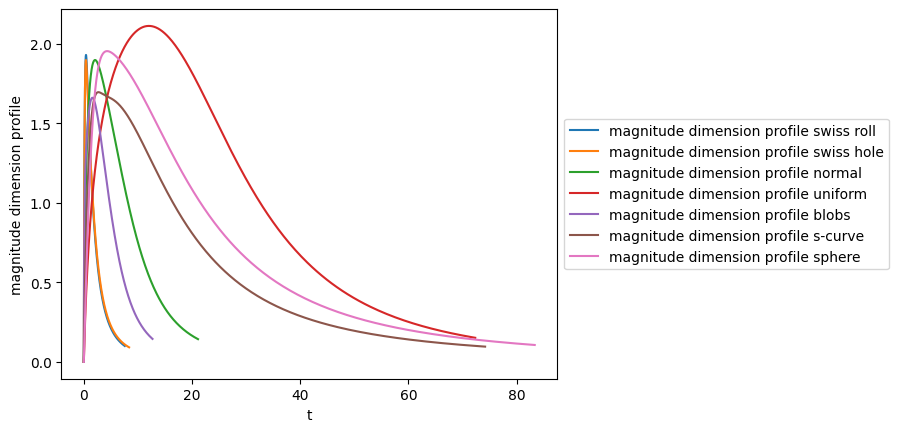

In [46]:
mag_dims=[]
for Mag in mags:
    Mag.get_magnitude_dimension_profile()
    Mag.plot_magnitude_dimension_profile()
    print(f"The magnitude dimension of {Mag.get_name()} equals {round(Mag.get_magnitude_dimension(),2)}.")
    mag_dims.append(Mag.get_magnitude_dimension())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Diversity Measures and Magnitude Differences

### MagArea Measures Intrinsic Diversity

Finally, we can compare the intrinsic diversity of each space using MagArea, the area under each magnitude function, for comparison across the same scales of distances i.e. the same evaluation interval. The higher MagArea the more diverse the space.

MagArea of swiss roll evaluated across [0.0, 7.6] equals 695.75
MagArea of swiss hole evaluated across [0.0, 7.6] equals 682.44
MagArea of normal evaluated across [0.0, 7.6] equals 226.32
MagArea of uniform evaluated across [0.0, 7.6] equals 16.16
MagArea of blobs evaluated across [0.0, 7.6] equals 423.79
MagArea of s-curve evaluated across [0.0, 7.6] equals 67.66
MagArea of sphere evaluated across [0.0, 7.6] equals 37.89


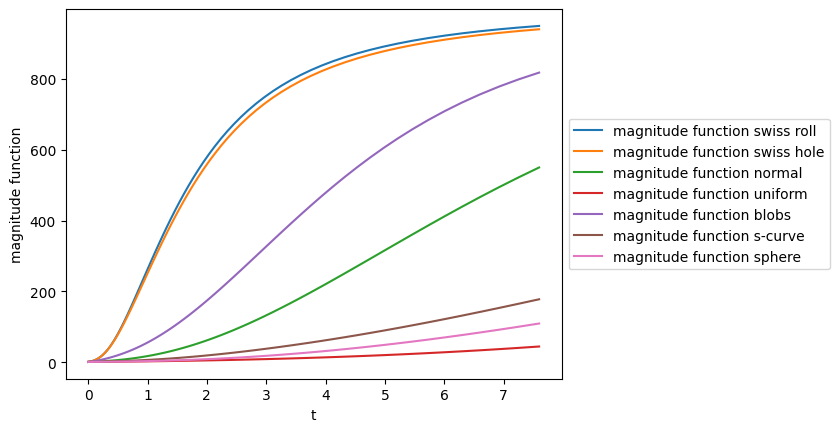

In [30]:
mags2 = mags.copy()
for i, Mag in enumerate(mags2):
    Mag.change_scales(t_cut=t_cut)
    ts=Mag.get_scales()
    Mag.plot_magnitude_function()
    mag, ts = Mag.get_magnitude()
    mag_area = Mag.get_magnitude_area(absolute_area=True, scale=True, plot=False)
    print(f"MagArea of {Mag.get_name()} evaluated across [{round(ts[0],2)}, {round(ts[-1],2)}] equals {round(mag_area,2)}")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### MagDiff Evaluates the Difference in Diversity

Further, we can conduct more detailed comparisons by taking MagDiff, the area between two magnitude functions, as a measure of dissimilarity. We compare each space's magnitude to the Swiss Roll, the most diverse space with teh highest magnitude, plot the absolute MagDiff across each scale.

MagDiff swiss roll - swiss roll evaluated between [0,7.6] equals 0.0
MagDiff swiss roll - swiss hole evaluated between [0,7.6] equals 101.12
MagDiff swiss roll - normal evaluated between [0,7.6] equals 3567.58
MagDiff swiss roll - uniform evaluated between [0,7.6] equals 5164.75
MagDiff swiss roll - blobs evaluated between [0,7.6] equals 2066.86
MagDiff swiss roll - s-curve evaluated between [0,7.6] equals 4773.32
MagDiff swiss roll - sphere evaluated between [0,7.6] equals 4999.62


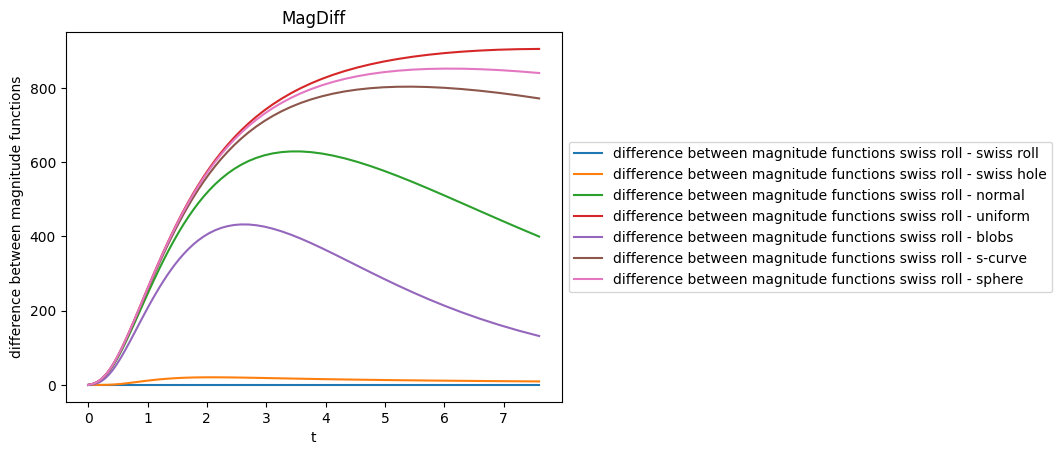

In [31]:
Mag0=mags2[0]
for Mag in mags2:
    mag_diff = Mag0.get_magnitude_difference(Mag, scale=False, t_cut=t_cut, plot=True, absolute_area=False)
    print(f"MagDiff {Mag0.get_name()} - {Mag.get_name()} evaluated between [0,{round(t_cut,2)}] equals {round(mag_diff,2)}")
    plt.title("MagDiff")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))